# In Class Notebook, Week 08

You can always paste the URL of this notebook (https://github.com/UIUC-iSchool-DataViz/is445_AOUAOG_fall2021/blob/master/week08/inClass_week08.ipynb ) into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

First, import our usual things:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import bqplot
import pandas as pd
# new one:
import geopandas

## Quick look at bqplot maps

In [2]:
bqplot.Map?

In [4]:
# 1. data (data & axis are meshed together)
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# 2. scales -- projection
sc_geo = bqplot.Mercator() # we already know this is not a great projection!

# 3. Marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# no interactions!

# put it all together
fig = bqplot.Figure(marks=[shape_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [5]:
# 1. data (data & axis are meshed together)
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# 2. scales -- projection
sc_geo = bqplot.Gnomonic() # we already know this is not a great projection!

# 3. Marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# no interactions!

# put it all together
fig = bqplot.Figure(marks=[shape_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

Above were world maps, we can also zoom into the US:

In [7]:
# 1. data (data & axis are meshed together)
shape_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. scales -- projection
sc_geo = bqplot.AlbersUSA() # we already know this is not a great projection!

# 3. Marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# no interactions!

# put it all together
fig = bqplot.Figure(marks=[shape_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

There is some interactivity available in bqplot:

In [9]:
# 1. data (data & axis are meshed together)
shape_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. scales -- projection
sc_geo = bqplot.AlbersUSA() # we already know this is not a great projection!

# 3. Marks
tt = bqplot.Tooltip(fields=['id','name'])
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo}, tooltip=tt)

# Add in tooltip
shape_map.interactions = {'click':'select', 'hover':'tooltip'}

# put it all together
fig = bqplot.Figure(marks=[shape_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [10]:
# this command on Windows would be dir not ls
# also, probably in a different location
!ls /Users/jillnaiman/opt/anaconda3/pkgs/bqplot-0.12.2-py_0/site-packages/bqplot/map_data

EuropeMap.json     USCountiesMap.json USStatesMap.json   WorldMap.json


## Focus on Geopandas

In [11]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

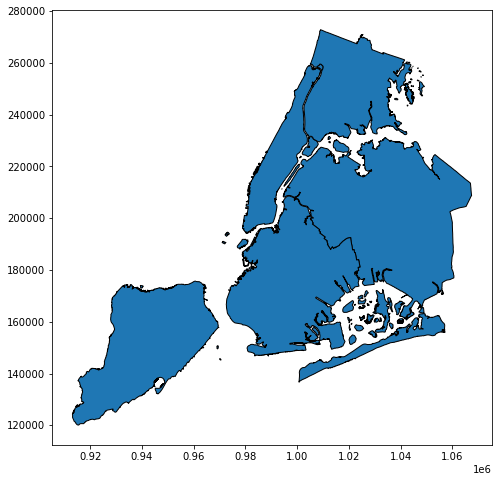

In [14]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
df.plot(figsize=(8,8), edgecolor='k')

In [15]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

In [16]:
gdf_councils

,OBJECTID_1,District,Council_me,ShapeSTArea,ShapeSTLength,geometry
0,811,5,Vanna Pianfetti,1.827758e+08,209845.933925,"POLYGON ((-88.31441 40.11699, -88.31454 40.116..."
1,812,3,Daniel Iniguez,2.007085e+08,145404.494177,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
2,813,1,Davion Williams,1.078965e+08,83420.727939,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
3,814,4,Michael Foellmer,1.049800e+08,77363.320814,"POLYGON ((-88.26890 40.12733, -88.27076 40.127..."
4,815,2,Alicia Beck,5.164512e+07,62243.277115,"POLYGON ((-88.23537 40.10798, -88.23537 40.107..."


In [17]:
gdf_councils.describe()

,OBJECTID_1,ShapeSTArea,ShapeSTLength
count,5.000000,5.000000e+00,5.000000
mean,813.000000,1.296012e+08,115655.550794
std,1.581139,6.131525e+07,61471.695860
min,811.000000,5.164512e+07,62243.277115
25%,812.000000,1.049800e+08,77363.320814
50%,813.000000,1.078965e+08,83420.727939
75%,814.000000,1.827758e+08,145404.494177
max,815.000000,2.007085e+08,209845.933925


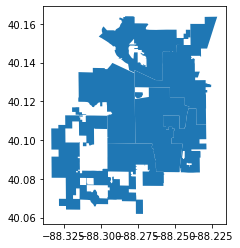

In [18]:
gdf_councils.plot()

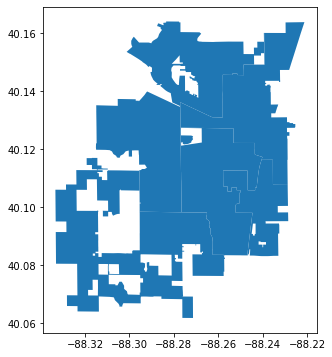

In [19]:
fig, ax = plt.subplots(figsize=(6,6))
gdf_councils.plot(ax=ax)
plt.show()

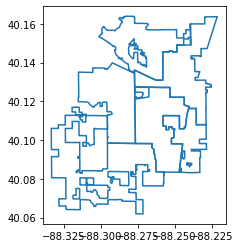

In [20]:
gdf_councils.boundary.plot()

In [21]:
gdf_councils.bounds

,minx,miny,maxx,maxy
0,-88.333303,40.061894,-88.257012,40.116995
1,-88.315071,40.098268,-88.239120,40.163956
2,-88.277158,40.107938,-88.221225,40.163721
3,-88.276971,40.083257,-88.240119,40.127432
4,-88.257818,40.083182,-88.228505,40.116346


In [22]:
gdf_councils.centroid

/Users/jillnaiman/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0    POINT (-88.29998 40.08731)
1    POINT (-88.28231 40.13389)
2    POINT (-88.24309 40.13570)
3    POINT (-88.25983 40.10719)
4    POINT (-88.24095 40.10021)
dtype: geometry

In [23]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
gdf_props = geopandas.read_file('https://opendata.arcgis.com/datasets/3ecbc7baf1a44110a98f6d4420432000_2.geojson')

In [25]:
gdf_props

,OBJECTID,COMMENTS,CB,DEPT,PIN,ACREAGE,CODE_TYPE,DESCRIPTION,TYPE,DEPT_ABBR,DESCRIP_ADDR,FUTURE,PA,ZONING,ShapeSTArea,ShapeSTLength,geometry
0,1,,,PWD,412001326010,0.755*,A,Drainage/Boneyard,Boneyard Channel,PWD,Boneyard Channel,Flood Hazard Area,101.0,MHP,32930.497803,897.925620,"POLYGON ((-88.25043 40.13085, -88.25044 40.130..."
1,2,,None,NSD,422012226003,4.432*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,1930.800537,272.145439,"POLYGON ((-88.24300 40.12699, -88.24300 40.127..."
2,3,,None,NSD,422012226004,0.181*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,7915.196533,372.150616,"POLYGON ((-88.24300 40.12681, -88.24300 40.126..."
3,4,,None,NSD,422012226005,0.186*,D,City Redevelopment,Beardsley Park Plan,NSD,1108 N Neil,Neighborhood Plan,1.0,SF 1,8104.292847,377.890980,"POLYGON ((-88.24344 40.12663, -88.24300 40.126..."
4,5,,None,NSD,422012226006,0.185*,D,City Redevelopment,Beardsley Park Plan,NSD,1106 N Neil,Neighborhood Plan,1.0,SF 1,8088.671143,377.710096,"POLYGON ((-88.24344 40.12645, -88.24299 40.126..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,7393,Stormwater Land Acquisition and Recollection P...,2019-030,LEG,462107159011,0.058,None,Stormwater Land Acquisition and Recollection P...,None,LEG,102-1/2 E Washington St,Stormwater Management,NaN,None,2522.605225,208.486789,"POLYGON ((-88.23831 40.12025, -88.23845 40.120..."
544,7394,Stormwater Land Acquisition and Recollection P...,2019-030,LEG,462107159010,0.08,None,Stormwater Land Acquisition and Recollection P...,None,LEG,102 E Washington St,Stormwater Management,NaN,None,3500.096802,247.578422,"POLYGON ((-88.23845 40.12029, -88.23857 40.120..."
545,7792,None,CB 2019-030,LEG,412001478006,None,A,Drainage/Boneyard,Boneyard Channel,LEG,1403 N Market St,Flood Hazard Area,1.0,MF 1,444.948608,101.776134,"POLYGON ((-88.23943 40.12993, -88.23943 40.130..."
546,7795,Stormwater Land Acquisition and Recollection P...,2019-030,LEG,412002336025,0.139,None,Stormwater Land Acquisition and Recollection P...,None,LEG,20 Hedge Ct,Stormwater management,NaN,None,8699.049561,387.724057,"POLYGON ((-88.26759 40.13109, -88.26793 40.131..."
